In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Importing Necessary Libraries

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
pd.set_option("display.max_columns", None)
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

Importing Dataset

In [3]:
df.shape

(1000, 40)

There are 1000rows and 40 columns in this dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

As we can see our target variable have object data type and it means it is a classification problem

In [5]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

All the columns



In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

As we can see only one column have null values and that column have 100% Nan, So we have to drop this

In [8]:
df.drop('_c39', axis = 1,inplace = True)

Drop the _c39 column because it does not have any single value

In [9]:
df.replace("?", np.nan, inplace = True)
df.head(5)

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft              NaN      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft              NaN      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1             NaN   
2                         7                            3              NO   
3                         5                            1             NaN   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                     NaN                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

But the data set have question marks in it so we converted them into Nan

In [10]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

As we can see after converting the question mark into Nan , We have 3 columns with Nan's , So we have to fill them

In [11]:
var = ['police_report_available','property_damage','collision_type']

for i in var:
    mode = df[i].mode()[0]
    df[i].fillna(mode,inplace = True)

Fill the Nan's with mode because the columns have object datatype

In [12]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Not a single Nan

In [13]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

All categorical columns

In [14]:
len(cat_df.columns)

21

In [15]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['PBMonth']=df['policy_bind_date'].apply(lambda x:x.month)
df['PBDay']=df['policy_bind_date'].apply(lambda x:x.day)
df['PBYear'] = df['policy_bind_date'].apply(lambda x:x.year)

Seprating the policy_bind_date column with month and date and year

In [16]:
df['incident_date']=pd.to_datetime(df['incident_date'])
df['In_Month']=df['incident_date'].apply(lambda x:x.month)
df['In_Day']=df['incident_date'].apply(lambda x:x.day)
df['In_Year'] = df['incident_date'].apply(lambda x:x.year)

Seprating the incident_date column with month and date and year

In [17]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-06-09           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    2015-01-25  Single Vehicle Collision   Side Collision      Major Damage   
1    2015-01-21             Vehicle Theft   Rear Collision      Minor Damage   
2    2015-02-22   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    2015-10-01  Single Vehicle Collision  Front Collision      Major Damage   
4    2015-02-17             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [18]:
df.drop('policy_bind_date',axis = 1,inplace = True)
df.drop('incident_date',axis = 1,inplace = True)

Drop the policy_bind_date and incident_date columns because we already seprated them

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

N    753
Y    247
Name: fraud_reported, dtype: int64

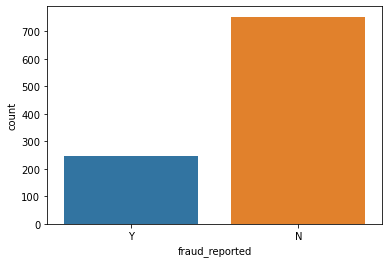

In [21]:
sns.countplot(df['fraud_reported'])
df['fraud_reported'].value_counts()

As we can see there are more no. of No's in fraud reported column and it means the data set have class imbalancing problem

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

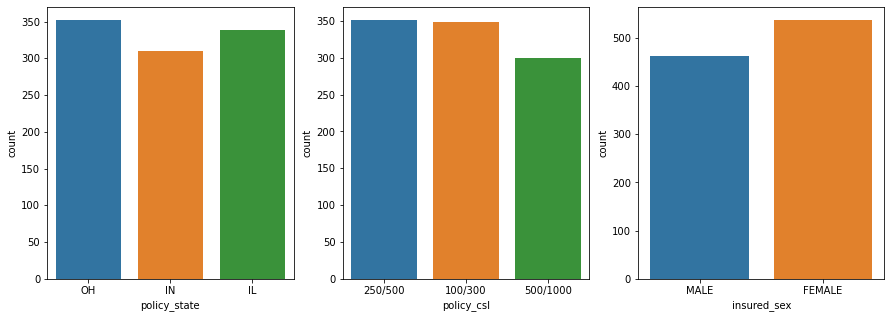

In [22]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.countplot(df['policy_state'])
plt.subplot(1,3,2)
sns.countplot(df['policy_csl'])
plt.subplot(1,3,3)
sns.countplot(df['insured_sex'])


As we can see the state , csl and gender have equal; numbers in the dataset

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

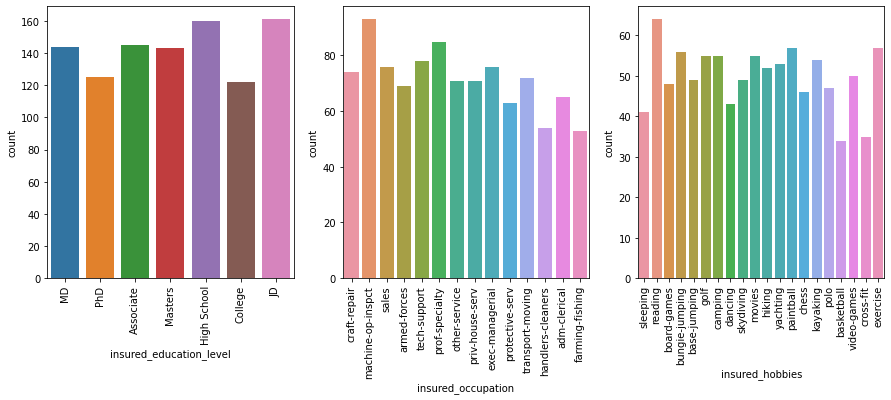

In [23]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.countplot(df['insured_education_level'])
plt.xticks(rotation = 90)
plt.subplot(1,3,2)
sns.countplot(df['insured_occupation'])
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
plt.xticks(rotation = 90)
sns.countplot(df['insured_hobbies'])


Not much diff in education level 

people with machine-op-inspct have more no's

reading , exercise , and paintball are higher in hobbies

<AxesSubplot:xlabel='collision_type', ylabel='count'>

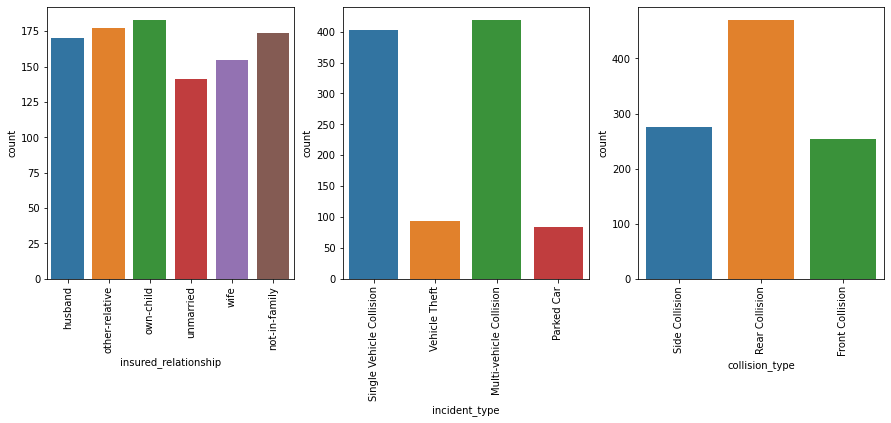

In [24]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.countplot(df['insured_relationship'])
plt.xticks(rotation = 90)
plt.subplot(1,3,2)
sns.countplot(df['incident_type'])
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
plt.xticks(rotation = 90)
sns.countplot(df['collision_type'])

Not much diff in relationship 

single vehicle and multi vehicle collision type of incident's are more 

Rear collision is more in collision type

<AxesSubplot:xlabel='incident_state', ylabel='count'>

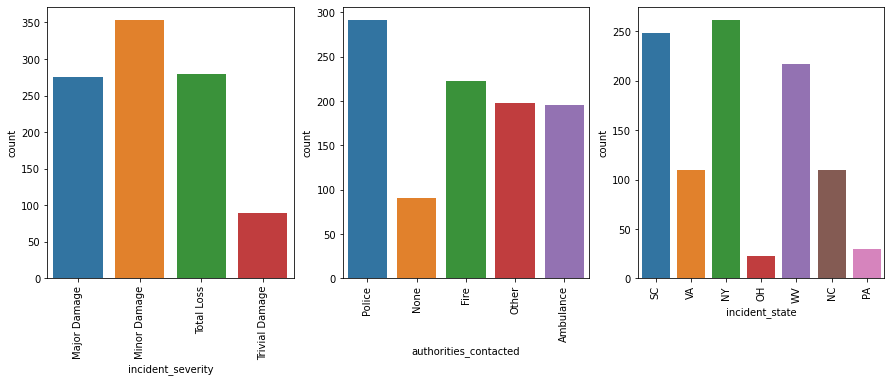

In [25]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.countplot(df['incident_severity'])
plt.xticks(rotation = 90)
plt.subplot(1,3,2)
sns.countplot(df['authorities_contacted'])
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
plt.xticks(rotation = 90)
sns.countplot(df['incident_state'])

Incident severity has not much diff in major andd minor damage but there are very less nu of Trival damage people

Most no of people contacted police 

SC , NY, WV  have more incidents

<AxesSubplot:xlabel='property_damage', ylabel='count'>

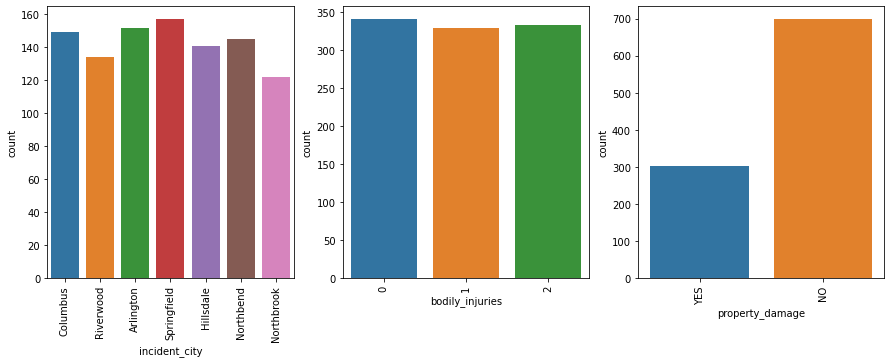

In [26]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.countplot(df['incident_city'])
plt.xticks(rotation = 90)
plt.subplot(1,3,2)
sns.countplot(df['bodily_injuries'])
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
plt.xticks(rotation = 90)
sns.countplot(df['property_damage'])

All cities haev same incidents

More people with No property damage

<AxesSubplot:xlabel='auto_year', ylabel='count'>

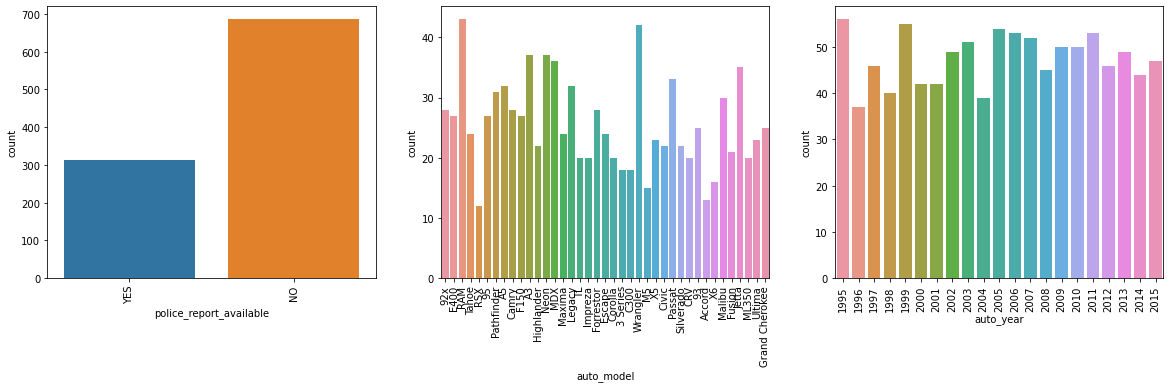

In [27]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.countplot(df['police_report_available'])
plt.xticks(rotation = 90)
plt.subplot(1,3,2)
sns.countplot(df['auto_model'])
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
plt.xticks(rotation = 90)
sns.countplot(df['auto_year'])

Most of the people does not have any police report 

Ram,Wrangler and jetta models are more 

Nearby all auto near have same count only 1996 have less count

<AxesSubplot:xlabel='months_as_customer', ylabel='Density'>

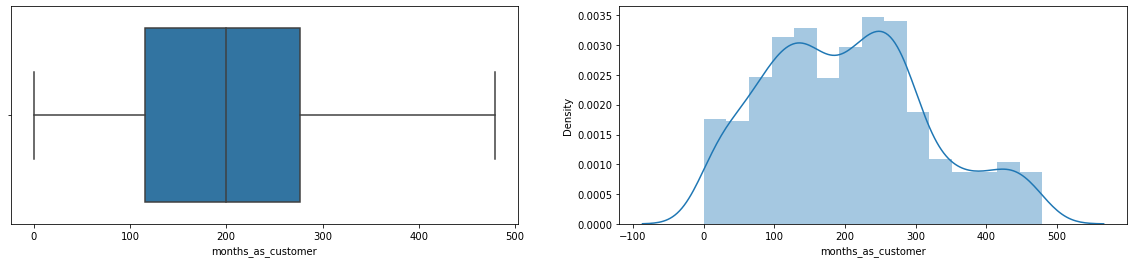

In [28]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['months_as_customer'])
plt.subplot(1,2,2)
sns.distplot(df['months_as_customer'])

From above observation we can see there is no outlier available and data is normally distributed

<AxesSubplot:xlabel='age', ylabel='Density'>

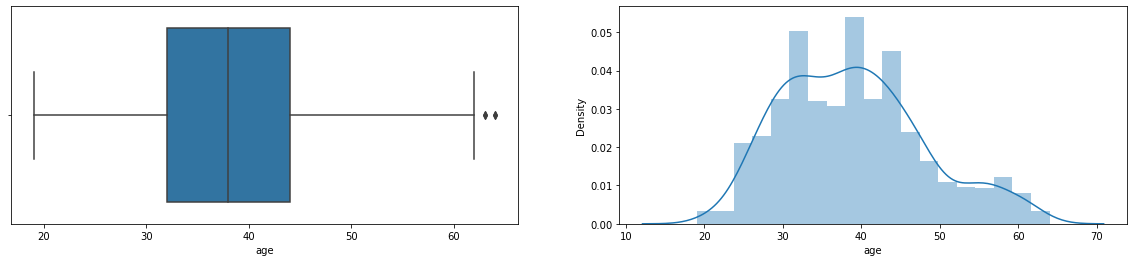

In [29]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['age'])
plt.subplot(1,2,2)
sns.distplot(df['age'])

From above observation we can see there are outliers available and data is skewed

<AxesSubplot:xlabel='policy_number', ylabel='Density'>

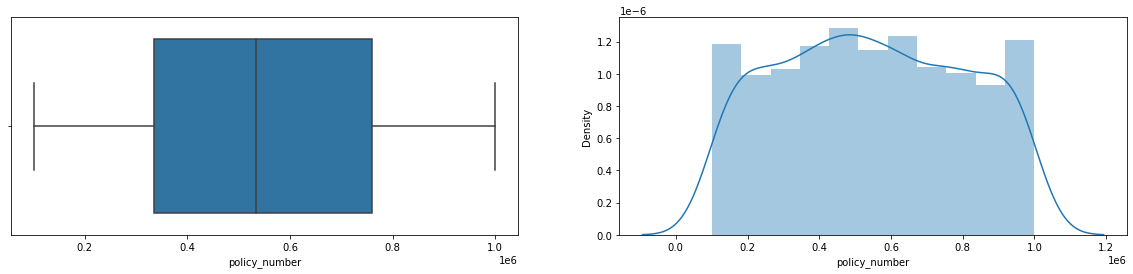

In [30]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['policy_number'])
plt.subplot(1,2,2)
sns.distplot(df['policy_number'])

From above observation we can see there is no outlier available and data is normally distributed

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

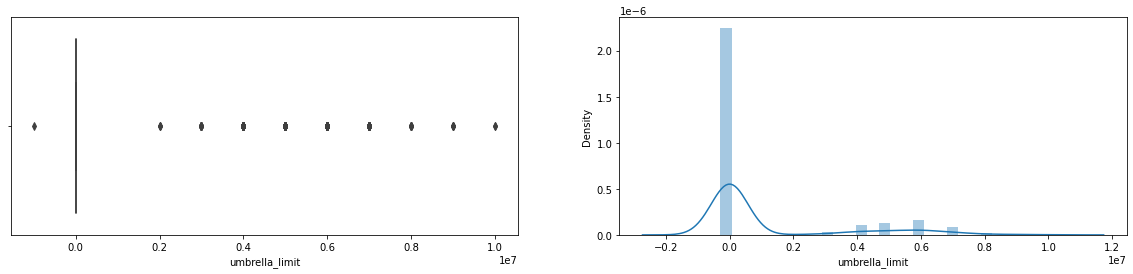

In [31]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['umbrella_limit'])
plt.subplot(1,2,2)
sns.distplot(df['umbrella_limit'])

From above observation we can see there are outliers available and data is skewed

<AxesSubplot:xlabel='insured_zip', ylabel='Density'>

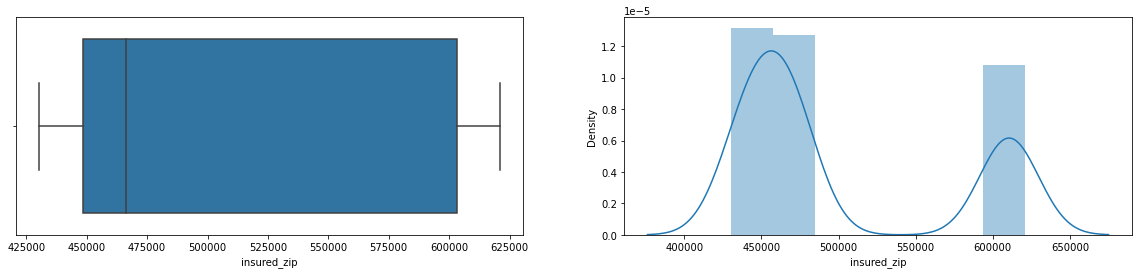

In [32]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['insured_zip'])
plt.subplot(1,2,2)
sns.distplot(df['insured_zip'])

From above observation we can see there is no outlier available and data is not normally distributed

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Density'>

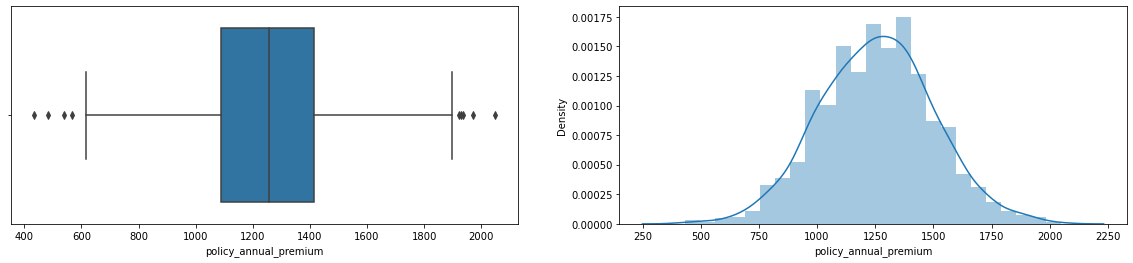

In [33]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['policy_annual_premium'])
plt.subplot(1,2,2)
sns.distplot(df['policy_annual_premium'])

From above observation we can see there are outliers available and data is skewed

<AxesSubplot:xlabel='capital-gains', ylabel='Density'>

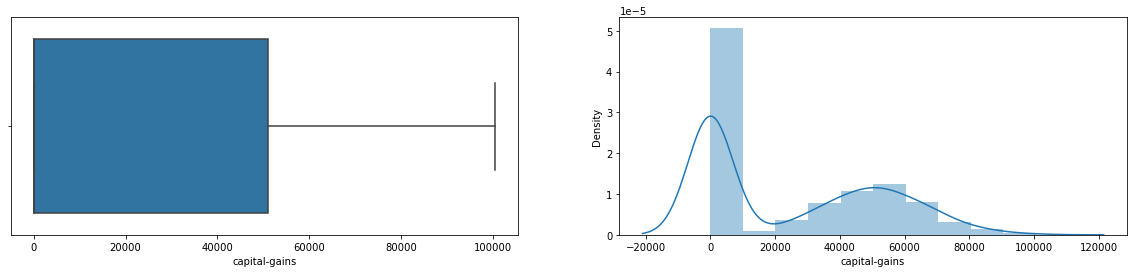

In [34]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['capital-gains'])
plt.subplot(1,2,2)
sns.distplot(df['capital-gains'])

From above observation we can see there is no outlier available and data is not normally distributed

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

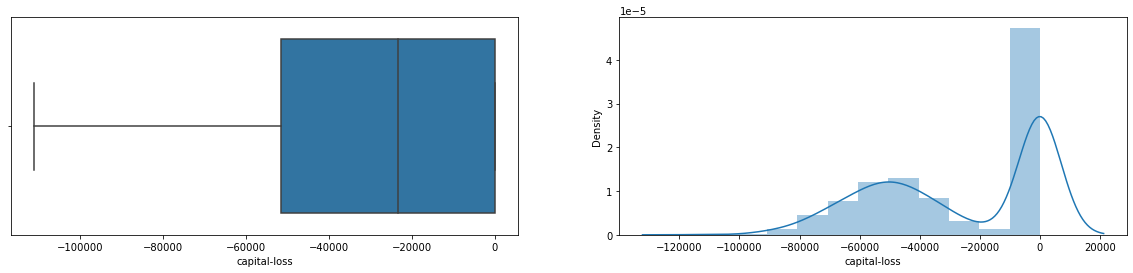

In [35]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['capital-loss'])
plt.subplot(1,2,2)
sns.distplot(df['capital-loss'])

From above observation we can see there is no outlier available and data is not normally distributed

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='Density'>

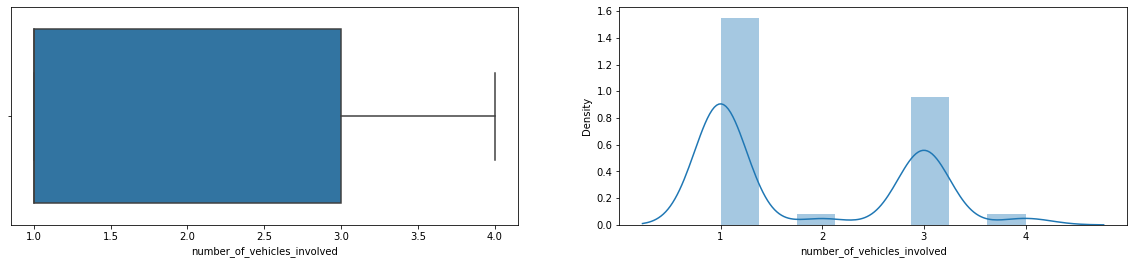

In [36]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['number_of_vehicles_involved'])
plt.subplot(1,2,2)
sns.distplot(df['number_of_vehicles_involved'])

From above observation we can see there is no outlier available and data is not normally distributed

<AxesSubplot:xlabel='witnesses', ylabel='Density'>

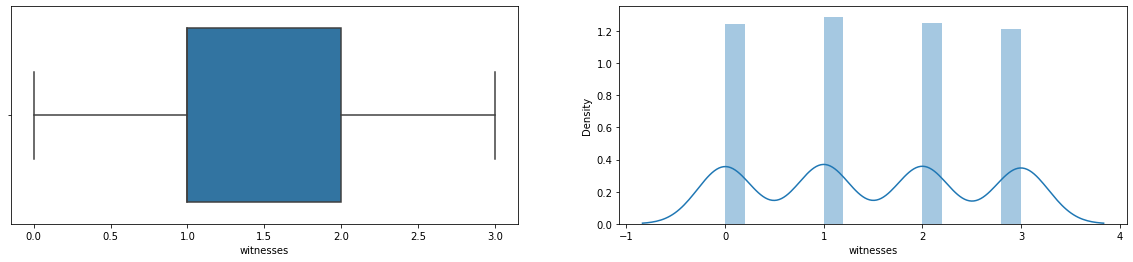

In [37]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['witnesses'])
plt.subplot(1,2,2)
sns.distplot(df['witnesses'])

From above observation we can see there is no outlier available and data is not normally distributed

<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

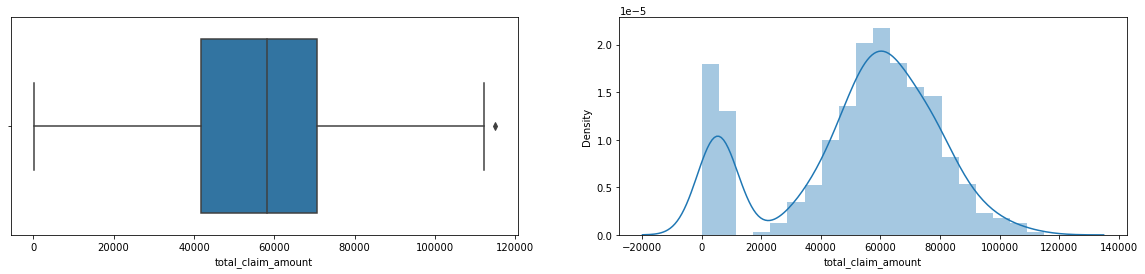

In [38]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['total_claim_amount'])
plt.subplot(1,2,2)
sns.distplot(df['total_claim_amount'])

From above observation we can see there are outlier available and data is skewed

<AxesSubplot:xlabel='injury_claim', ylabel='Density'>

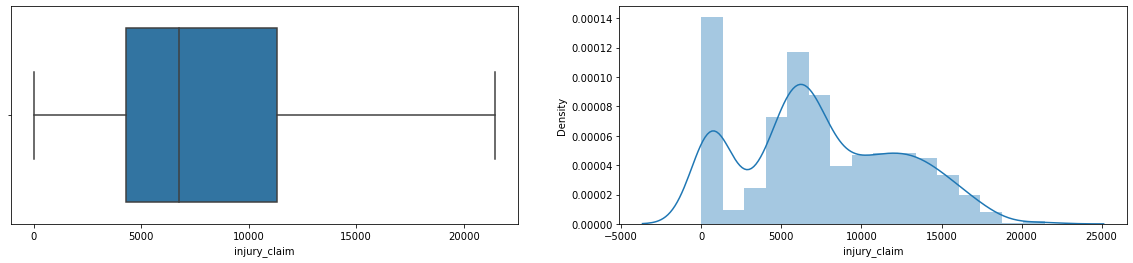

In [39]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['injury_claim'])
plt.subplot(1,2,2)
sns.distplot(df['injury_claim'])

From above observation we can see there is no outlier available and data is positively skewed

<AxesSubplot:xlabel='property_claim', ylabel='Density'>

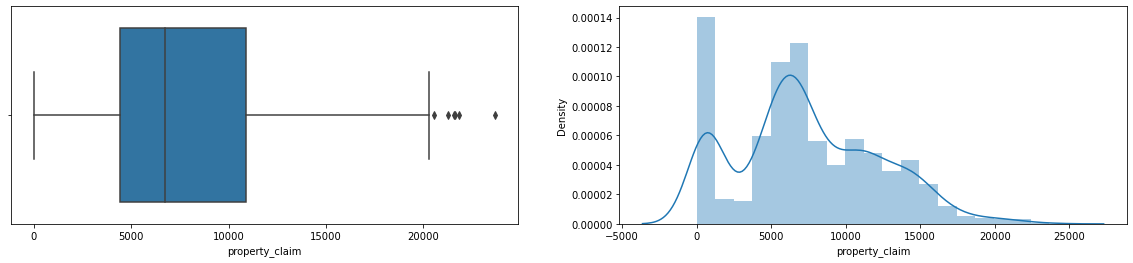

In [40]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['property_claim'])
plt.subplot(1,2,2)
sns.distplot(df['property_claim'])

From above observation we can see there are outliers available and data is skewed

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

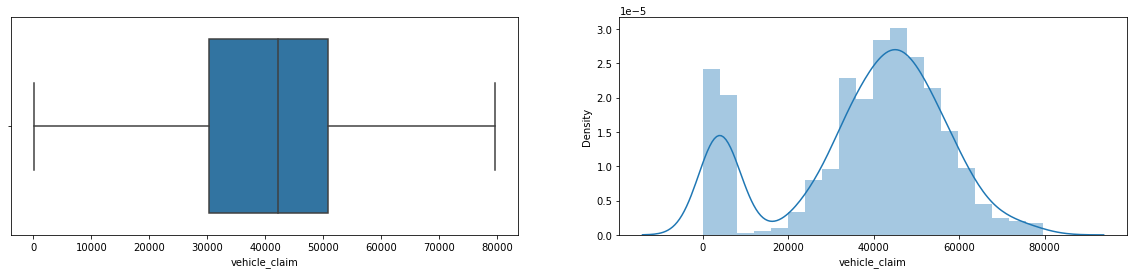

In [41]:
plt.figure(figsize = (20,4))
plt.subplot(1,2,1)
sns.boxplot(df['vehicle_claim'])
plt.subplot(1,2,2)
sns.distplot(df['vehicle_claim'])

From above observation we can see there is no outlier available and data is not normally distributed

<AxesSubplot:xlabel='incident_state', ylabel='vehicle_claim'>

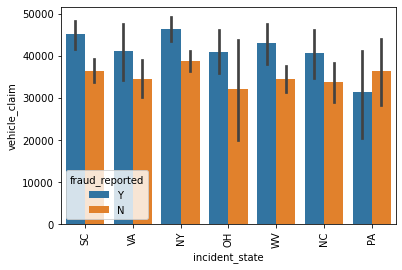

In [42]:
plt.xticks(rotation = 90)
sns.barplot(data = df, x ='incident_state',y ='vehicle_claim',hue = 'fraud_reported')

All the states have same no of vehicle claims

<AxesSubplot:xlabel='incident_state', ylabel='total_claim_amount'>

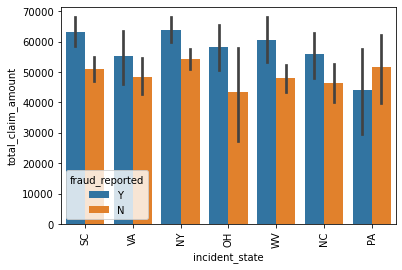

In [43]:
plt.xticks(rotation = 90)
sns.barplot(data = df, x ='incident_state',y ='total_claim_amount',hue = 'fraud_reported')

All the states have same no of total_claim_amount, less no of the people who did not reported fraud in every state

<AxesSubplot:xlabel='insured_sex', ylabel='age'>

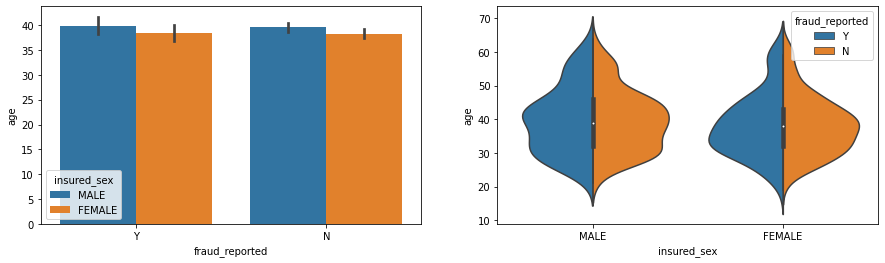

In [44]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'fraud_reported',y = 'age',hue = 'insured_sex')
plt.subplot(1,2,2)
sns.violinplot(data =df ,x ='insured_sex',y ='age',hue= 'fraud_reported',split =True)

People of Age between 30 to 45 have more fraud reported

<AxesSubplot:xlabel='insured_sex', ylabel='total_claim_amount'>

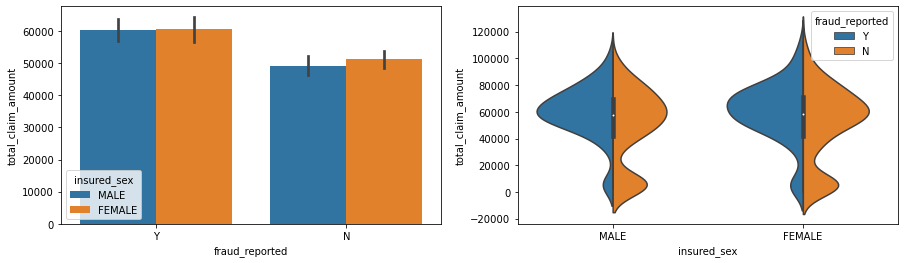

In [45]:
plt.figure(figsize = (15,4))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'fraud_reported',y = 'total_claim_amount',hue = 'insured_sex')
plt.subplot(1,2,2)
sns.violinplot(data =df ,x ='insured_sex',y ='total_claim_amount',hue= 'fraud_reported',split =True)

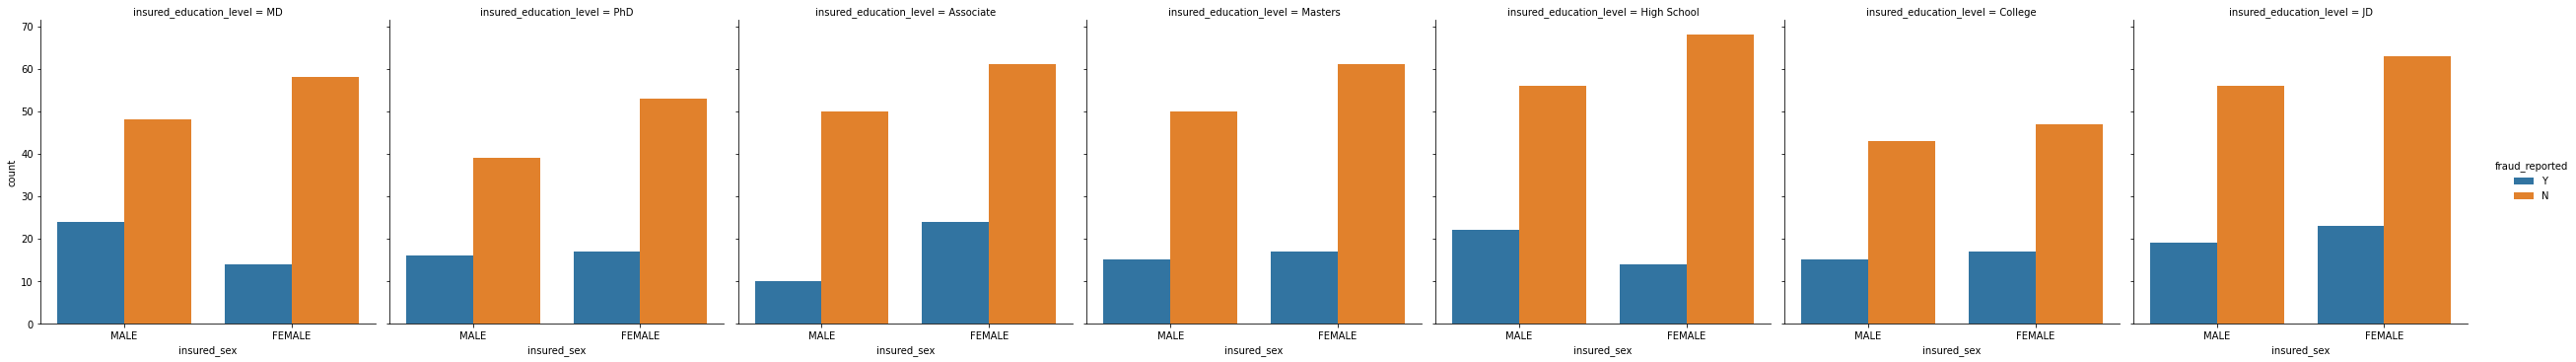

In [46]:
sns.catplot(data =df, x= 'insured_sex',hue ='fraud_reported',
           kind = 'count',col = 'insured_education_level')

Not much diff between insured education level

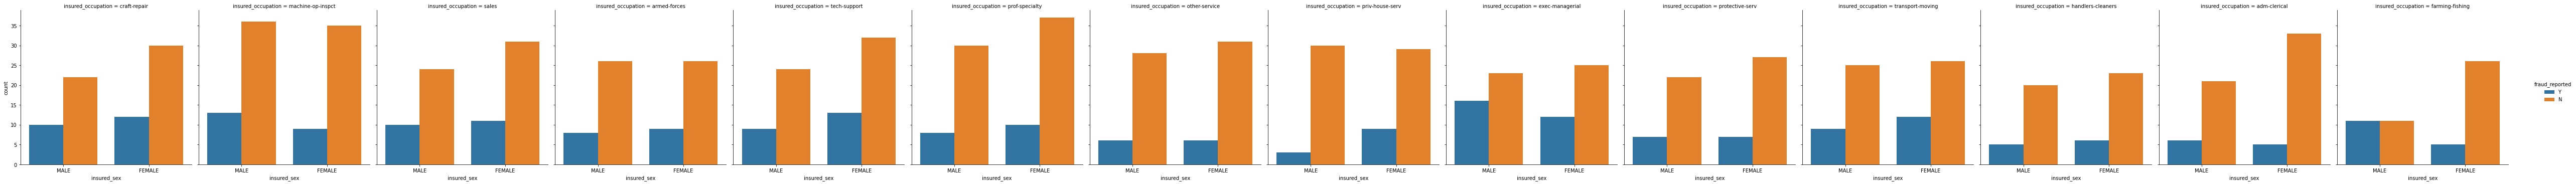

In [47]:
sns.catplot(data =df, x= 'insured_sex',hue ='fraud_reported',
           kind = 'count',col = 'insured_occupation')

Only farming and fishing occupation people reported less no of fraud

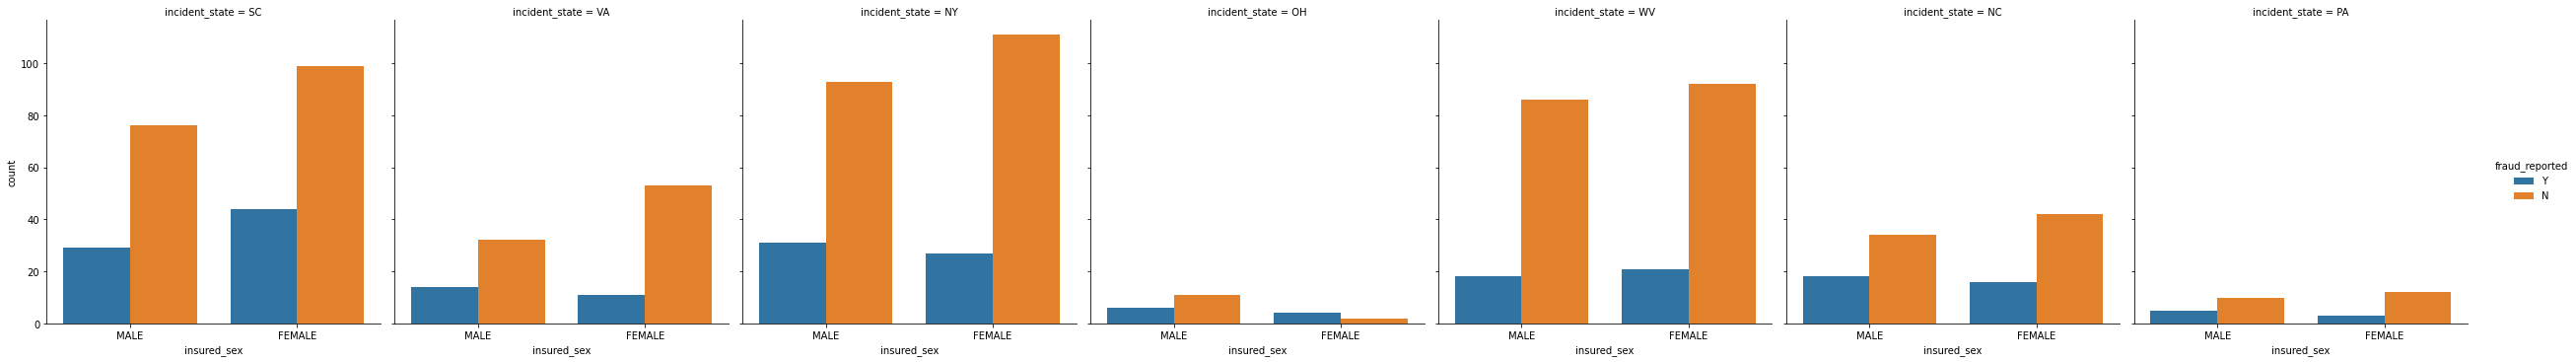

In [48]:
sns.catplot(data =df, x= 'insured_sex',hue ='fraud_reported',
           kind = 'count',col = 'incident_state')

The state OH and PA have less no of fraud reported

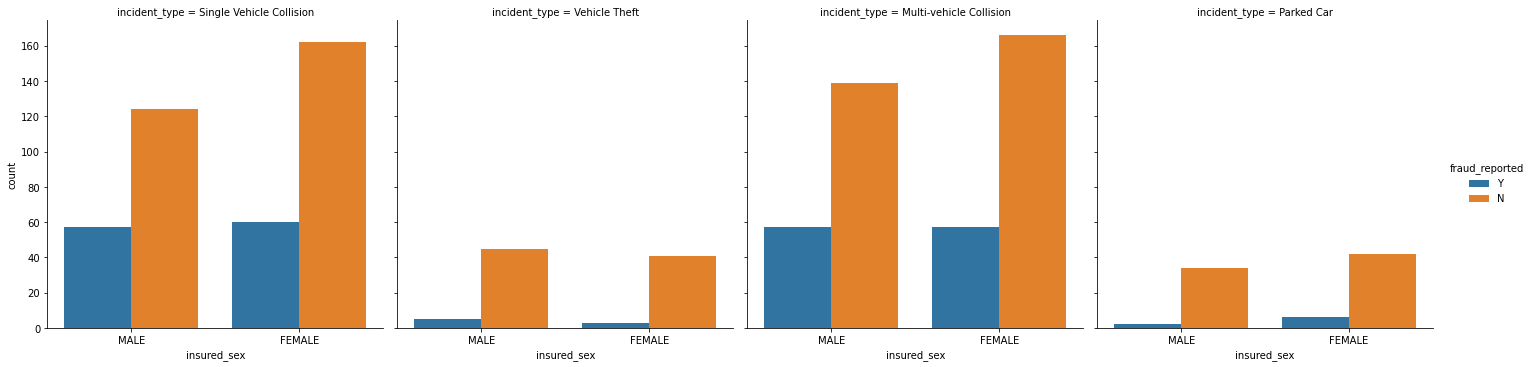

In [49]:
sns.catplot(data =df, x= 'insured_sex',hue ='fraud_reported',
           kind = 'count',col = 'incident_type')

Vehicle theft and Parked car have less fraud reported

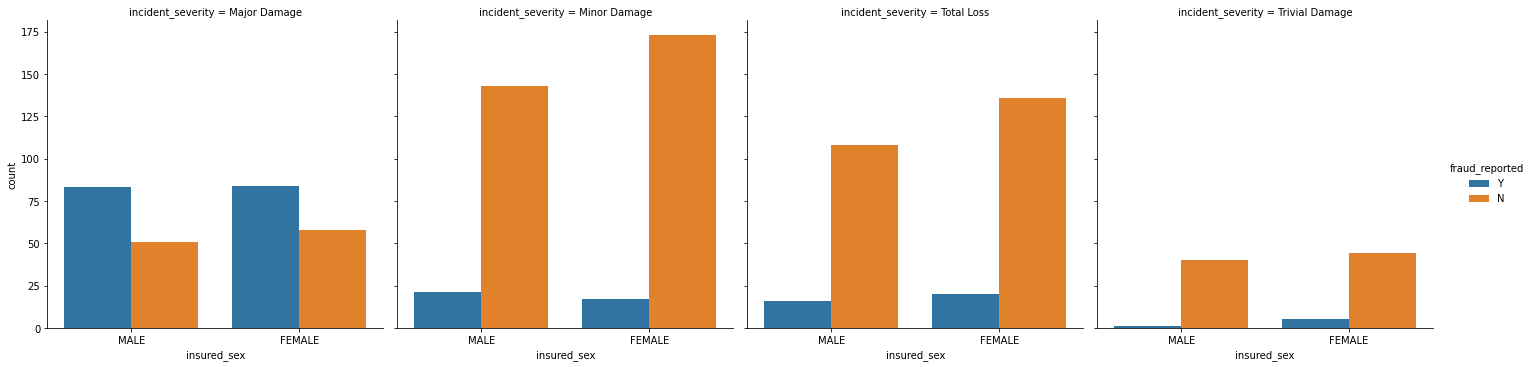

In [50]:
sns.catplot(data =df, x= 'insured_sex',hue ='fraud_reported',
           kind = 'count',col = 'incident_severity')

People have major damage have more no of Fraud reported and less no with trival damage

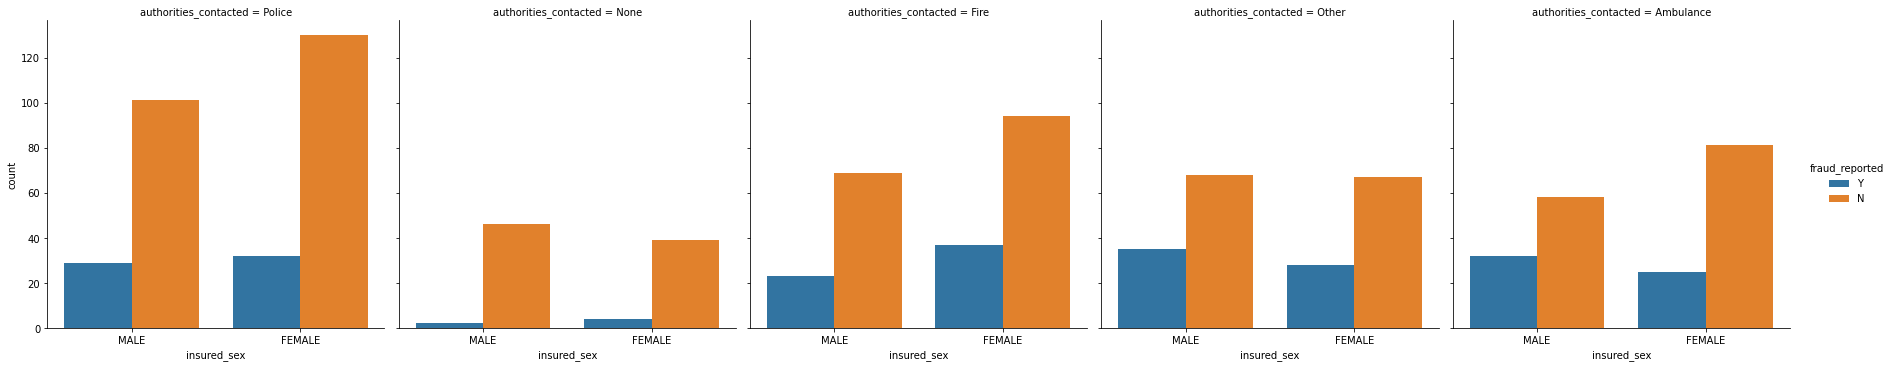

In [51]:
sns.catplot(data =df, x= 'insured_sex',hue ='fraud_reported',
           kind = 'count',col = 'authorities_contacted')

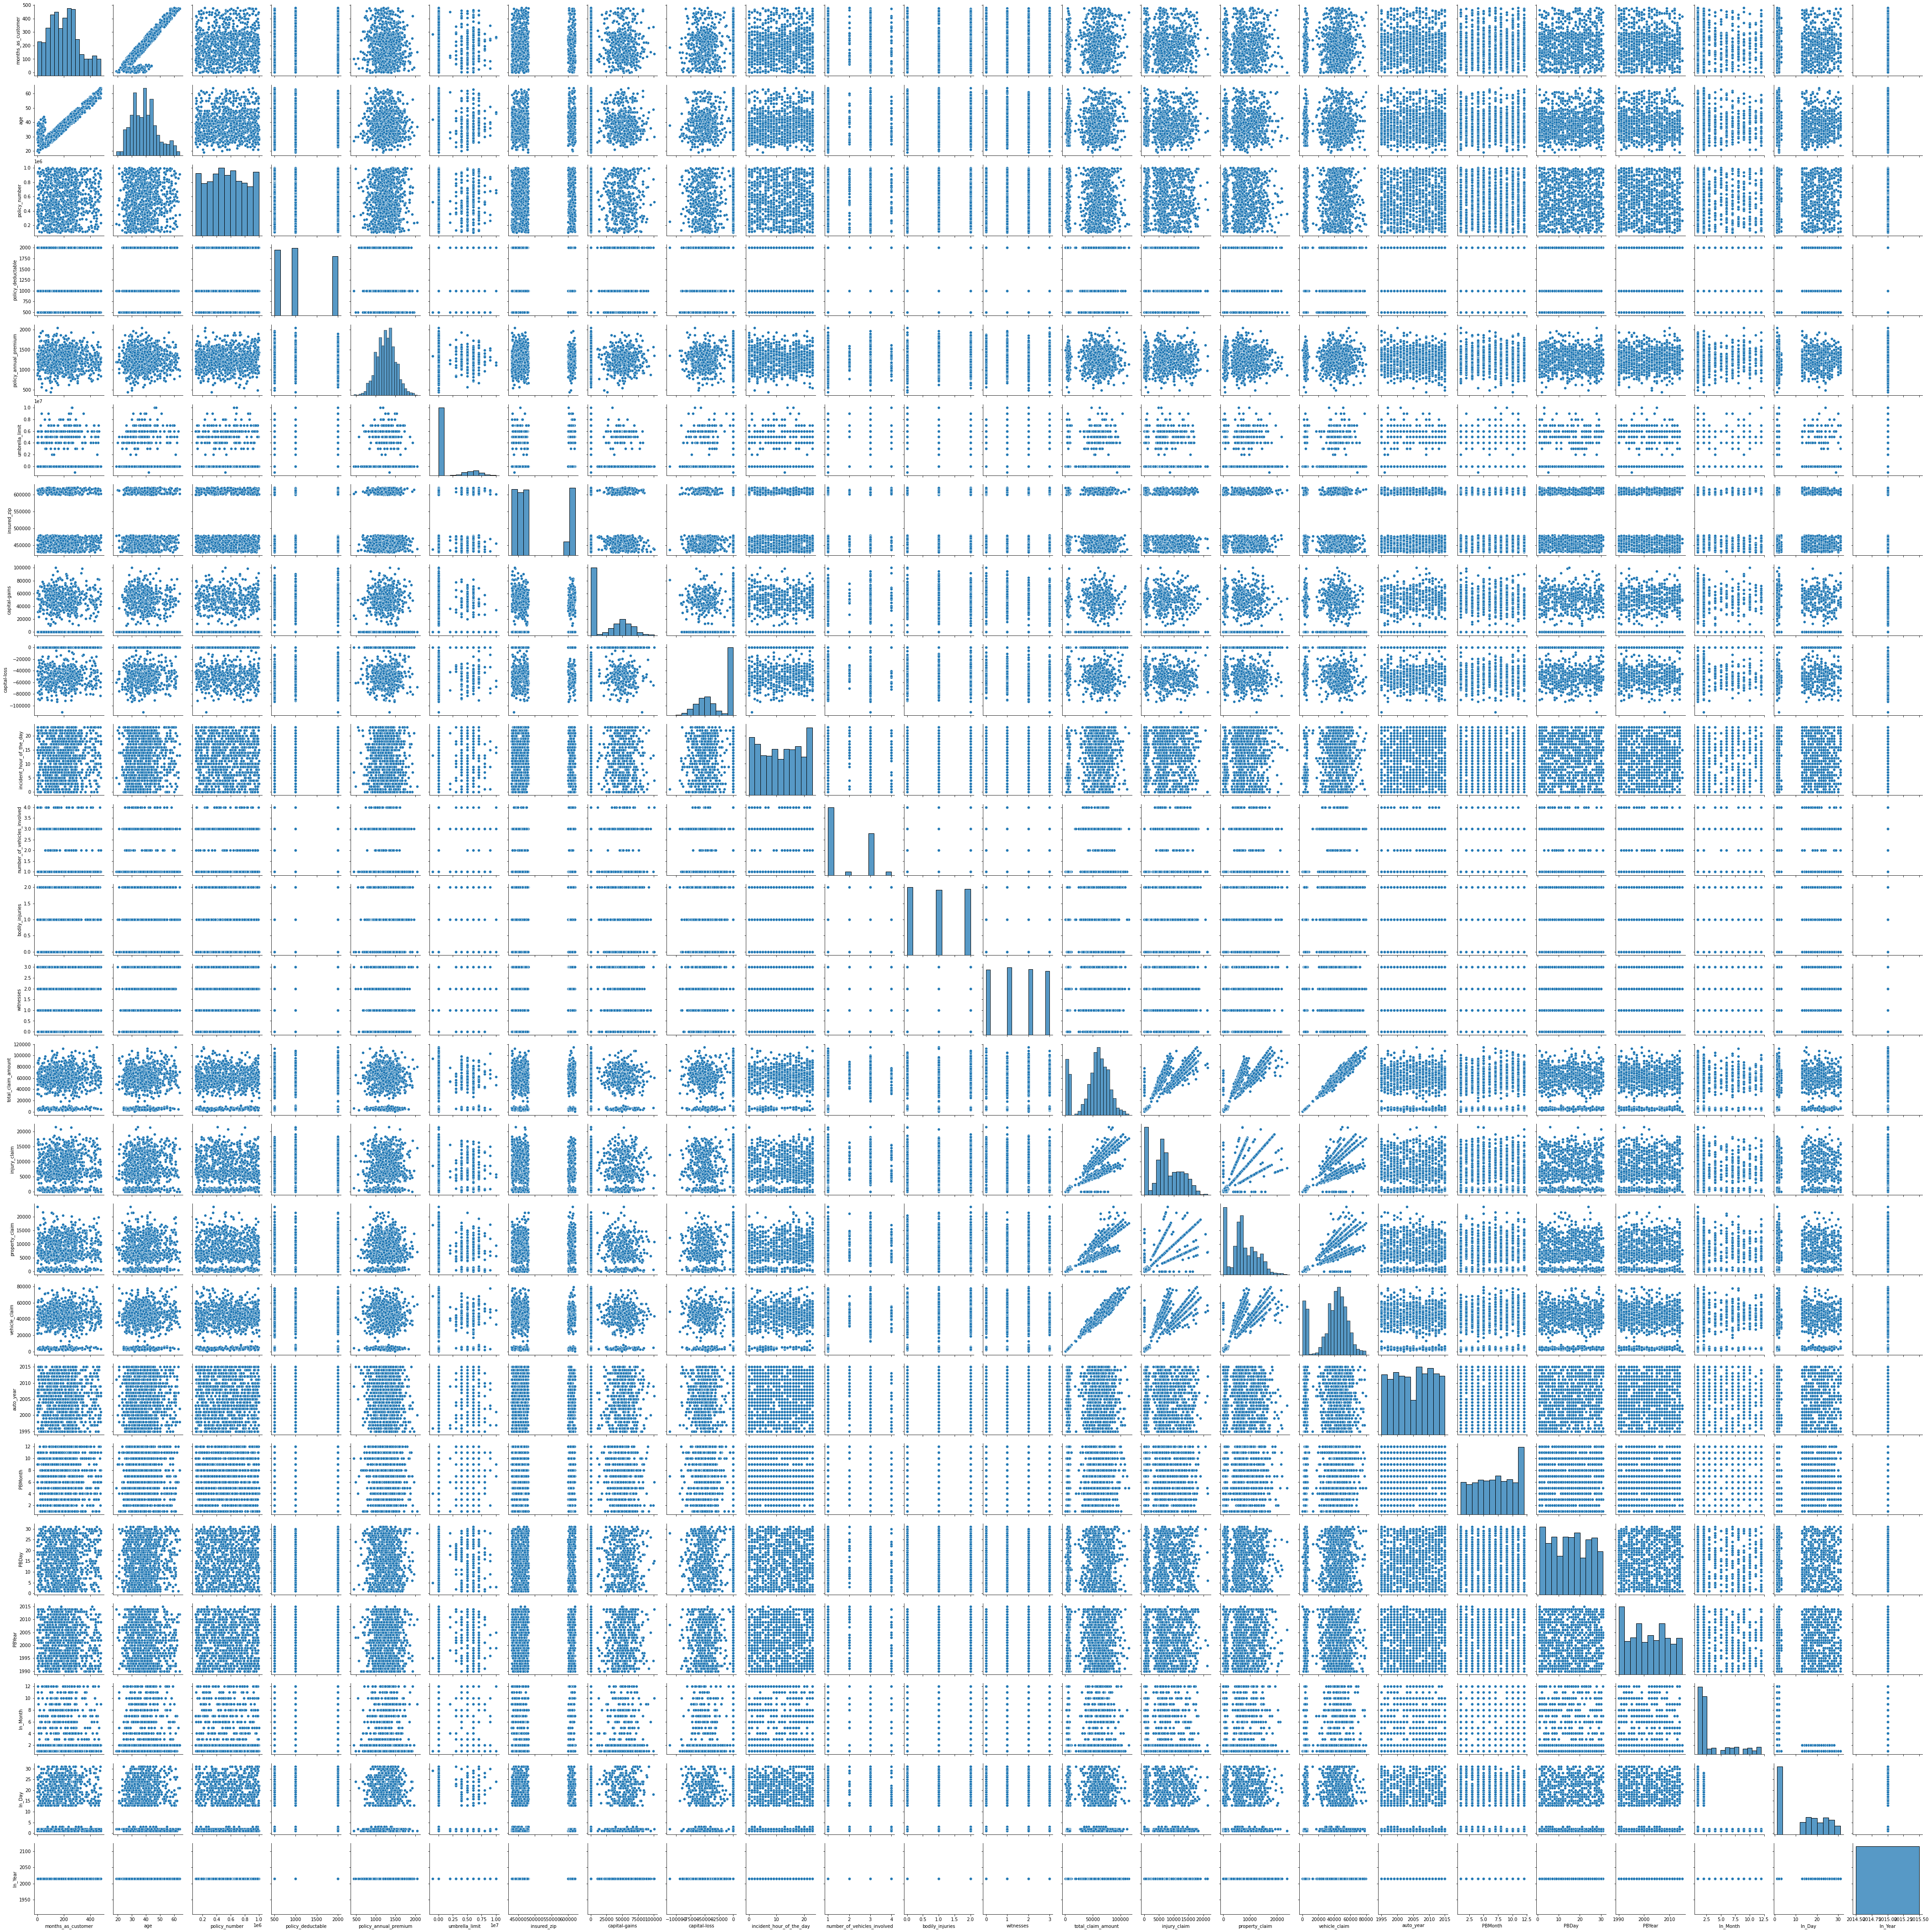

In [52]:
sns.pairplot(df)

In [53]:
df_corr = df.corr().abs()
df_corr

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188       0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399  0.007075       0.009802   
capital-loss                           0.020209  0.007368       0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                        0.010162  0.015679       0.004558   
witnesses                              0.058383  0.052359       0.012661   
total_claim_amount                     0.062108  0.069863       0.018009   
injury_claim                           0.065329  0.075522       0.008762   
property_claim                         0.034940  0.060898       0.010678   
vehicle_claim                          0.061013  0.062588       0.020184   
auto_year                              0.000292  0.001354       0.000183   
PBMonth                                0.005750  0.015501       0.005509   
PBDay                                  0.051728  0.053869       0.041885   
PBYear                                 0.048276  0.037444       0.040099   
In_Month                               0.024659  0.023404       0.042512   
In_Day                                 0.011092  0.006131       0.057199   
In_Year                                     NaN       NaN            NaN   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                         0.006738               0.022566   
policy_deductable                     1.000000               0.003245   
policy_annual_premium                 0.003245               1.000000   
umbrella_limit                        0.010870               0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212               0.013738   
capital-loss                          0.023544               0.023547   
incident_hour_of_the_day              0.060935               0.001578   
number_of_vehicles_involved           0.051214               0.045991   
bodily_injuries                       0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107               0.017633   
property_claim                        0.064792               0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105               0.049226   
PBMonth                               0.050416               0.035355   
PBDay                                 0.009164               0.025183   
PBYear                                0.049598               0.001249   
In_Month                              0.006418               0.021559   
In_Day                                0.018160               0.014835   
In_Year                                    NaN                    NaN   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604       0.007075   
policy_number                      0.008968     0.007083       0.009802   
po

Corelation between the columns

<AxesSubplot:>

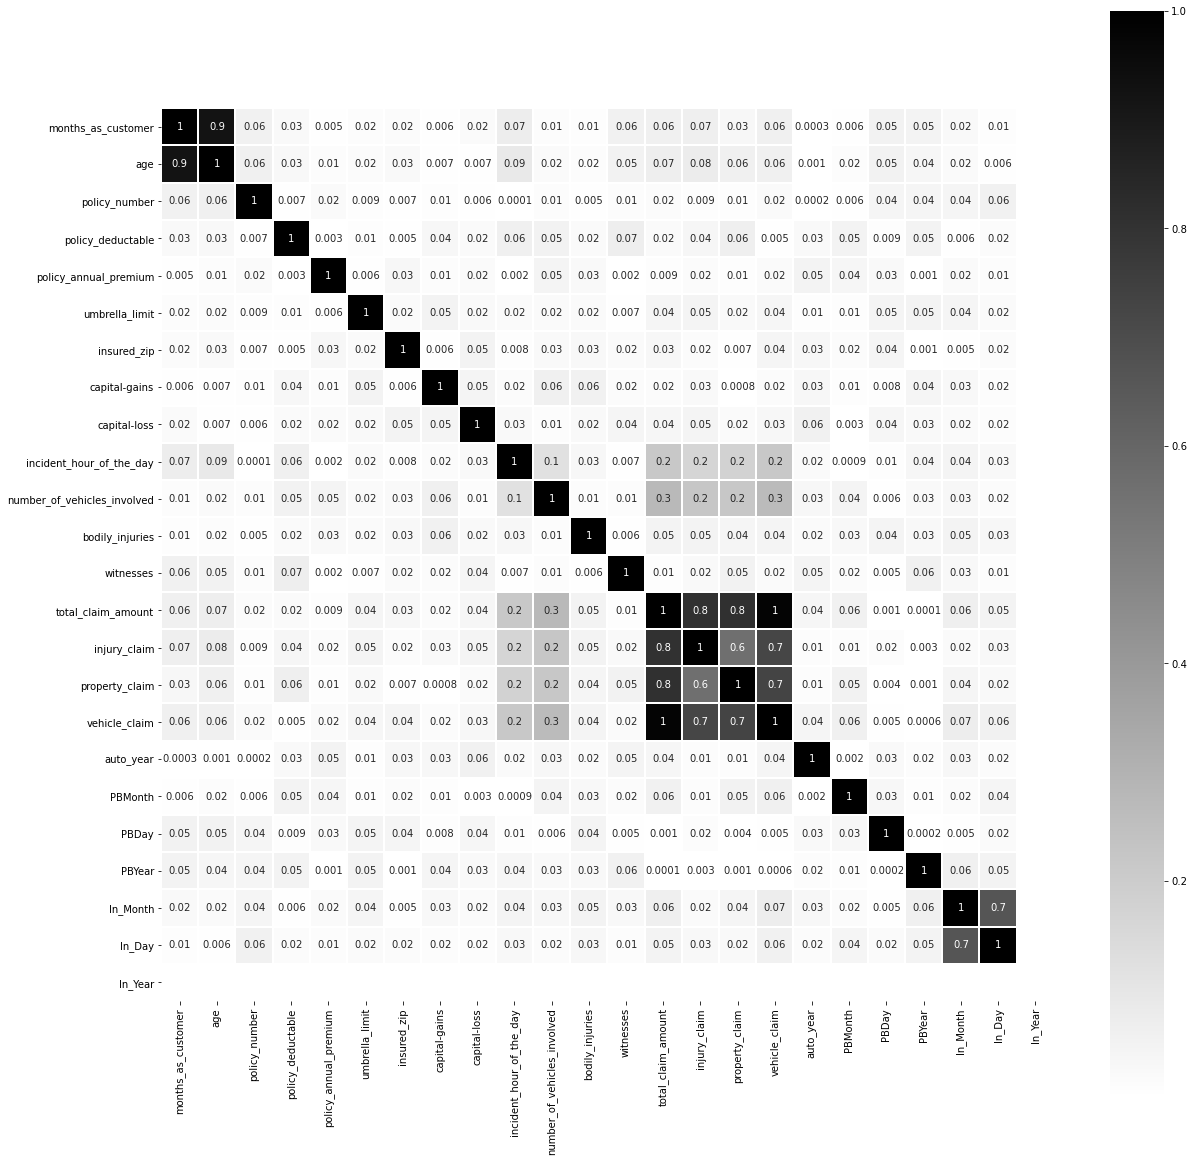

In [54]:
plt.figure(figsize = (20,20))
sns.heatmap(df_corr,annot = True , square =True,
           fmt = '.1g',linewidth= 1, cmap = 'binary')

In [55]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score, GridSearchCV

In [56]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [57]:
le = LabelEncoder()
for i in cat_df:
    df[i] = le.fit_transform(df[i])
df

months_as_customer  age  policy_number  policy_state  policy_csl  \
0                   328   48         521585             2           1   
1                   228   42         342868             1           1   
2                   134   29         687698             2           0   
3                   256   41         227811             0           1   
4                   228   44         367455             0           2   
..                  ...  ...            ...           ...         ...   
995                   3   38         941851             2           2   
996                 285   41         186934             0           0   
997                 130   34         918516             2           1   
998                 458   62         533940             0           2   
999                 456   60         556080             2           1   

     policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0                 1000                1406.91               0       466132   
1                 2000                1197.22         5000000       468176   
2                 2000                1413.14         5000000       430632   
3                 2000                1415.74         6000000       608117   
4                 1000                1583.91         6000000       610706   
..                 ...                    ...             ...          ...   
995               1000                1310.80               0       431289   
996               1000                1436.79               0       608177   
997                500                1383.49         3000000       442797   
998               2000                1356.92         5000000       441714   
999               1000                 766.19               0       612260   

     insured_sex  insured_education_level  insured_occupation  \
0              1                        4                   2   
1              1                        4                   6   
2              0                        6                  11   
3              0                        6                   1   
4              1                        0                  11   
..           ...                      ...                 ...   
995            0                        5                   2   
996            0                        6                   9   
997            0                        5                   1   
998            1                        0                   5   
999            0                        0                  11   

     insured_hobbies  insured_relationship  capital-gains  capital-loss  \
0                 17                     0          53300             0   
1                 15                     2              0             0   
2                  2                     3          35100             0   
3                  2                     4          48900        -62400   
4                  2                     4          66000        -46000   
..               ...                   ...            ...           ...   
995               13                     4              0             0   
996               17                     5          70900             0   
997                3                     2          35100             0   
998                0                     5              0             0   
999               11                     0              0             0   

     incident_type  collision_type  incident_severity  authorities_contacted  \
0                2               2                  0                      4   
1                3               1                  1                      4   
2                0               1                  1                      4   
3                2               0                  0                      4   
4                3               1                  1                      2   
..             ...           

Converting the categorical columns with numerical by label encoding

In [58]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


In [59]:
outcol = df[['age','umbrella_limit','total_claim_amount','property_claim','policy_annual_premium']]
z = np.abs(zscore(outcol))
df_new = df[(z<3).all(axis = 1)]

Removing the outliers from the dataset

In [60]:
print('Shape Before and After')
print('Shape Before:',df.shape)
print('Shape After:',df_new.shape)
print('Percentage Loss:',((df.shape[0]-df_new.shape[0])/df.shape[0])*100)

Shape Before and After
Shape Before: (1000, 43)
Shape After: (981, 43)
Percentage Loss: 1.9


As we can see after removing outlierrs in result we get 1.9 % data loss

In [61]:
x = df_new.drop('fraud_reported',axis = 1)
y = df_new['fraud_reported']

Seprating the feature and lable 

In [62]:
x.skew()

months_as_customer             0.363268
age                            0.475942
policy_number                  0.038201
policy_state                  -0.038101
policy_csl                     0.098092
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
insured_zip                    0.838685
insured_sex                    0.141238
insured_education_level        0.006225
insured_occupation            -0.057292
insured_hobbies               -0.060134
insured_relationship           0.076242
capital-gains                  0.465985
capital-loss                  -0.390468
incident_type                  0.092461
collision_type                -0.032704
incident_severity              0.278443
authorities_contacted         -0.112301
incident_state                -0.147048
incident_city                  0.042537
incident_location             -0.002655
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989


Checking the skewness of the features and we can see that the major no of the columns are categorical columns only number_of_vehicles_involved have skewness

In [63]:
x['number_of_vehicles_involved'] = np.sqrt(df['number_of_vehicles_involved'])

Removing skewness

In [64]:
x.skew()

months_as_customer             0.363268
age                            0.475942
policy_number                  0.038201
policy_state                  -0.038101
policy_csl                     0.098092
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
insured_zip                    0.838685
insured_sex                    0.141238
insured_education_level        0.006225
insured_occupation            -0.057292
insured_hobbies               -0.060134
insured_relationship           0.076242
capital-gains                  0.465985
capital-loss                  -0.390468
incident_type                  0.092461
collision_type                -0.032704
incident_severity              0.278443
authorities_contacted         -0.112301
incident_state                -0.147048
incident_city                  0.042537
incident_location             -0.002655
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.444067


Skewness removed

In [65]:
y.value_counts()

0    741
1    240
Name: fraud_reported, dtype: int64

As we saw earlier there is class imbalancing problem ,so we need to cure it

In [66]:
SM = SMOTE()
x,y = SM.fit_resample(x,y)

Resampling the label 

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

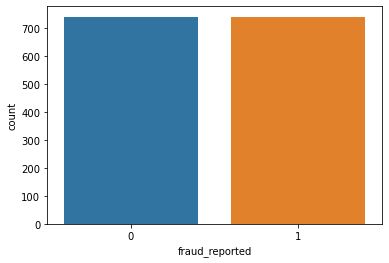

In [72]:
sns.countplot(y)

In [67]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

Scaling the data by using standard scaler

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 25)

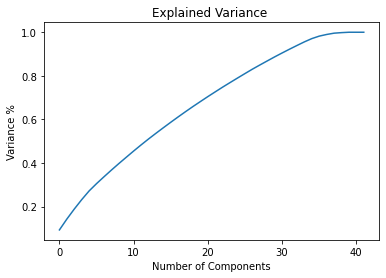

In [74]:
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained Variance ')
plt.show()

We are using PCA for reducing the dimension of the dataset and we can see that if we use 30 compo still we get 80 % of variance 

In [78]:
pca  = PCA(n_components = 30)
new_x = pca.fit_transform(x_scaled)

Dimension reduced to 30

In [82]:
x.shape

(1482, 42)

Shape before PCA

In [80]:
new_x.shape

(1482, 30)

Shape after PCA

In [83]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test,y_train,y_test = train_test_split(new_x,y,test_size = 0.25,random_state = i)
    log_reg = LogisticRegression()
    log_reg.fit(x_train, y_train)
    pred = log_reg.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best Accuracy is',maxAccu, 'on Random State',maxRS)

Best Accuracy is 0.8140161725067385 on Random State 189


We get 189 as best random state

In [84]:
x_train ,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state = maxRS)

Accuracy_Score : 0.8059299191374663
Confusion_Matrix:
 [[142  41]
 [ 31 157]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       183
           1       0.79      0.84      0.81       188

    accuracy                           0.81       371
   macro avg       0.81      0.81      0.81       371
weighted avg       0.81      0.81      0.81       371

Roc_Auc Score: 0.8055313335658645


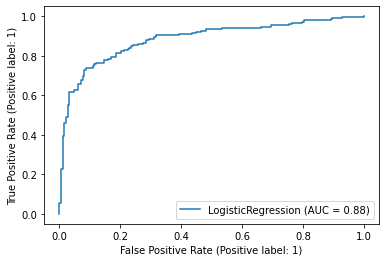

In [85]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
predlr = log_reg.predict(x_test)
LRC = accuracy_score(y_test,predlr)
print('Accuracy_Score :',LRC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predlr))
print('Classification_Report:\n',classification_report(y_test,predlr))
print('Roc_Auc Score:',roc_auc_score(y_test,predlr))

metrics.plot_roc_curve(log_reg, x_test, y_test)  
plt.show()  

By using LogisticRegression We get 80.59 Accuracy Score

Accuracy_Score : 0.816711590296496
Confusion_Matrix:
 [[144  39]
 [ 29 159]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81       183
           1       0.80      0.85      0.82       188

    accuracy                           0.82       371
   macro avg       0.82      0.82      0.82       371
weighted avg       0.82      0.82      0.82       371

Roc_Auc Score: 0.8163149633763516


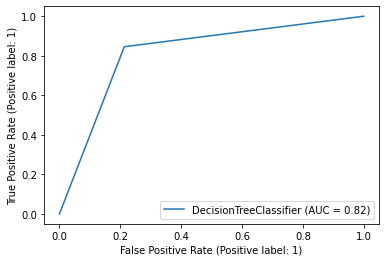

In [86]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
DTC = accuracy_score(y_test,preddt)
print('Accuracy_Score :',DTC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,preddt))
print('Classification_Report:\n',classification_report(y_test,preddt))
print('Roc_Auc Score:',roc_auc_score(y_test,preddt))

metrics.plot_roc_curve(dt, x_test, y_test)  
plt.show()  


By using DecisionTreeClassifier We get 81.67 Accuracy Score

Accuracy_Score : 0.8706199460916442
Confusion_Matrix:
 [[159  24]
 [ 24 164]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       183
           1       0.87      0.87      0.87       188

    accuracy                           0.87       371
   macro avg       0.87      0.87      0.87       371
weighted avg       0.87      0.87      0.87       371

Roc_Auc Score: 0.8705964422741541


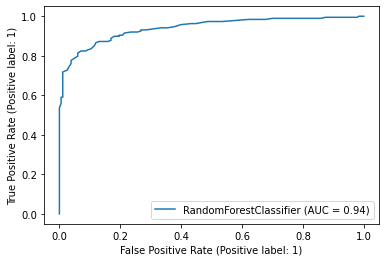

In [87]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
RFC = accuracy_score(y_test,predrf)
print('Accuracy_Score :',RFC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predrf))
print('Classification_Report:\n',classification_report(y_test,predrf))
print('Roc_Auc Score:',roc_auc_score(y_test,predrf))

metrics.plot_roc_curve(rf, x_test, y_test)  
plt.show()  

By using RandomForestClassifier We get 87.06 Accuracy Score

Accuracy_Score : 0.8679245283018868
Confusion_Matrix:
 [[170  13]
 [ 36 152]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.87       183
           1       0.92      0.81      0.86       188

    accuracy                           0.87       371
   macro avg       0.87      0.87      0.87       371
weighted avg       0.87      0.87      0.87       371

Roc_Auc Score: 0.868736193465876


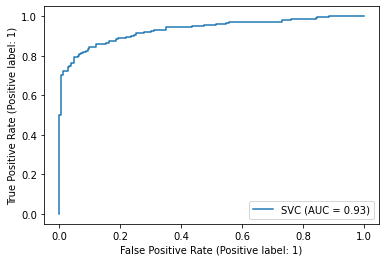

In [88]:
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
SVC = accuracy_score(y_test,predsvc)
print('Accuracy_Score :',SVC)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predsvc))
print('Classification_Report:\n',classification_report(y_test,predsvc))
print('Roc_Auc Score:',roc_auc_score(y_test,predsvc))

metrics.plot_roc_curve(svc, x_test, y_test)  
plt.show()  

By using SVC We get 86.79 Accuracy Score

Accuracy_Score : 0.6765498652291105
Confusion_Matrix:
 [[ 69 114]
 [  6 182]]
Classification_Report:
               precision    recall  f1-score   support

           0       0.92      0.38      0.53       183
           1       0.61      0.97      0.75       188

    accuracy                           0.68       371
   macro avg       0.77      0.67      0.64       371
weighted avg       0.77      0.68      0.64       371

Roc_Auc Score: 0.6725671433554238


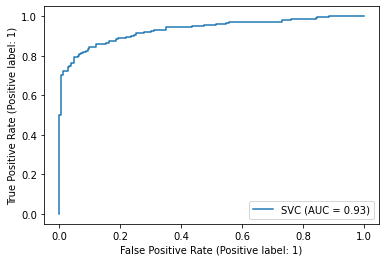

In [89]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
KNN = accuracy_score(y_test,predknn)
print('Accuracy_Score :',KNN)
print('Confusion_Matrix:\n',confusion_matrix(y_test,predknn))
print('Classification_Report:\n',classification_report(y_test,predknn))
print('Roc_Auc Score:',roc_auc_score(y_test,predknn))

metrics.plot_roc_curve(svc, x_test, y_test)  
plt.show()  

By using KNeighborsClassifier We get 67.65 Accuracy Score

In [90]:
#Calculating Cross_Val_score
LRCV = cross_val_score(log_reg, x, y, cv = 5)
print('Cross Validation score of LogisticRegression model:',LRCV.mean())

Cross Validation score of LogisticRegression model: 0.5809809809809809


In [91]:
DTCV = cross_val_score(dt, x, y, cv = 5)
print('Cross Validation score of DecisionTree model:',DTCV.mean())

Cross Validation score of DecisionTree model: 0.801051051051051


In [92]:
RFCV = cross_val_score(rf,x,y,cv = 5)
print('Cross Validation score of RandomForest model:',RFCV.mean())

Cross Validation score of RandomForest model: 0.8631426881426881


In [93]:
SVCV = cross_val_score(svc,x,y,cv = 5)
print('Cross Validation score of SVC model:',SVCV.mean())

Cross Validation score of SVC model: 0.5114682864682865


In [94]:
KNNCV = cross_val_score(knn,x,y,cv = 5)
print('Cross Validation DScore of KNN model:',KNNCV.mean())

Cross Validation DScore of KNN model: 0.6801733551733552


In [95]:
#Creating DataFrame of Difference between acc_Score and CV score
pd.DataFrame({'Model':['Logistic Regression','RandomForestClassifier','DecisionTreeClassifier','SVC','KNeighborsClassifier'],
             'acc_score':[LRC,RFC,DTC,SVC,KNN],
             'cross_val_score':[LRCV.mean(),RFCV.mean(),DTCV.mean(),SVCV.mean(),KNNCV.mean()],
             'Difference':[(LRC-LRCV.mean()),(RFC-RFCV.mean()),(DTC-DTCV.mean()),(SVC-SVCV.mean()),(KNN-KNNCV.mean())]})

Model  acc_score  cross_val_score  Difference
0     Logistic Regression   0.805930         0.580981    0.224949
1  RandomForestClassifier   0.870620         0.863143    0.007477
2  DecisionTreeClassifier   0.816712         0.801051    0.015661
3                     SVC   0.867925         0.511468    0.356456
4    KNeighborsClassifier   0.676550         0.680173   -0.003623

As we can see We get best accuracy score and minimum CV score from RandomForestClassifier and DecisionTreeClassifier so we use both for GridSearchCV

In [96]:
#GridSearchCV Parameteers for RandomForestClassifier
#Adding parameters 
parameters = {'n_estimators':[20,30,40,50,60],
              'criterion':['gini','entropy'],
              'max_depth':[2,3,4,5,6,7],
              'max_features':['auto','sqrt','log2'],
              'min_samples_leaf':[1,2,3,4,5]}

Parameters for RandomForestClassifier

In [97]:
#Using GridSearchCV for finding best params
GCV = GridSearchCV(rf,parameters,cv = 5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 50}

We get best Params

Accuracy Score of the RF Model: 84.36657681940702
Cross Validation Score of RF Model is 84.82846482846483
Confusion Matrix:
 [[154  29]
 [ 29 159]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       183
           1       0.85      0.85      0.85       188

    accuracy                           0.84       371
   macro avg       0.84      0.84      0.84       371
weighted avg       0.84      0.84      0.84       371

roc_auc_score: 84.36373677479364


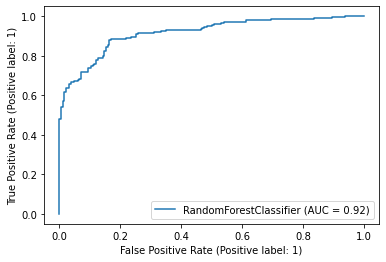

In [100]:
finalmod = RandomForestClassifier(criterion = 'gini',max_depth =7, max_features = 'sqrt',n_estimators = 50, min_samples_leaf = 1,)

finalmod.fit(x_train,y_train)
pred = finalmod.predict(x_test)
print('Accuracy Score of the RF Model:',accuracy_score(y_test,pred)*100)
finalmodCV = cross_val_score(finalmod,x,y,cv = 5)
print('Cross Validation Score of RF Model is',finalmodCV.mean()*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('Classification Report:\n',classification_report(y_test,pred))
print('roc_auc_score:',roc_auc_score(y_test,pred)*100)

metrics.plot_roc_curve(finalmod,x_test,y_test)
plt.show()


By applying best params to the RandomForestRegressor we get 84.36 Accuracy Score

In [104]:
#GridSearchCV Parameteers for DecisionTreeClassifier
#Adding parameters 
parameters = {'criterion' :['gini', 'entropy'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [4,5,6,7,8],
              'splitter' :['best', 'random']}

Parameters for DecisionTreeClassifier

In [105]:
GCV = GridSearchCV(DecisionTreeClassifier(),parameters,cv = 5)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'best'}

Best params

Accuracy Score of the DT Model: 80.86253369272237
Cross Validation Score of DT is 73.01824551824552
Confusion Matrix:
 [[157  26]
 [ 45 143]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       183
           1       0.85      0.76      0.80       188

    accuracy                           0.81       371
   macro avg       0.81      0.81      0.81       371
weighted avg       0.81      0.81      0.81       371

roc_auc_score: 80.928089757005


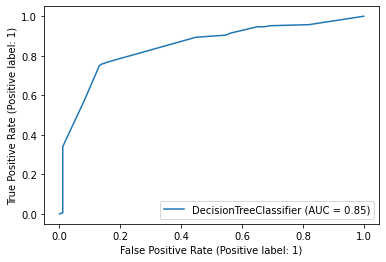

In [106]:
mod = DecisionTreeClassifier(criterion = 'entropy',max_features = 'log2',max_depth = 5,splitter = 'best')

mod.fit(x_train,y_train)
pred = mod.predict(x_test)
print('Accuracy Score of the DT Model:',accuracy_score(y_test,pred)*100)
modCV = cross_val_score(mod,x,y,cv = 5)
print('Cross Validation Score of DT is',modCV.mean()*100)
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('Classification Report:\n',classification_report(y_test,pred))
print('roc_auc_score:',roc_auc_score(y_test,pred)*100)

metrics.plot_roc_curve(mod,x_test,y_test)
plt.show()

By applying best params to the DecisionTreeClassifier we get 80.86 accuracy score and 73.01 CV score

In [107]:
#Saving Final Model
import joblib
joblib.dump(finalmod,'Insurance Claims-Fraud Detection.pkl')

['Insurance Claims-Fraud Detection.pkl']

Final Model saved